In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy
import scipy.optimize

Assuming the fluid is perfectely cylindrical, then the derivatives are zero, and we have to solve a simple algebraic equation for $\eta$ given the flux, and cylinder speed (and $\alpha$, D and $\epsilon$)

In [2]:
epsilon = 0.1; D = 0.6; alpha = 0.95;

In [3]:
def equation(eta, V, Q):
    return 1/3*eta**3+V*alpha/2*(1+eta/alpha)**2-Q

In [62]:
Q_vec = np.linspace(-3,3,30)
V_vec = np.linspace(3, -6, 50)
etas = np.zeros((len(Q_vec), len(V_vec)))
for j, Q in enumerate(Q_vec):
    for k, V in enumerate(V_vec):
        def equation(eta):
            return 1/3*eta**3+V*alpha/2*(1+eta/alpha)**2-Q
        
        etas[j,k] = max(scipy.optimize.fsolve(equation, .2),0)

/Users/javier/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/minpack.py:175: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  warnings.warn(msg, RuntimeWarning)
/Users/javier/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/minpack.py:175: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


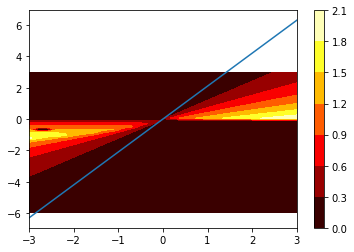

In [63]:
Q_mesh, V_mesh = np.meshgrid(Q_vec, V_vec)
plt.contourf(Q_mesh.T, V_mesh.T,etas, cmap='hot'); plt.colorbar()
plt.plot(Q_vec, 2/alpha*Q_vec)

0.0